In [48]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from datetime import timedelta

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN



import warnings
warnings.filterwarnings("ignore")

In [15]:
df = pd.read_csv("customers.csv")

In [16]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [17]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [21]:
df.columns = ["channel","region","fresh","milk","grocery","frozen","paper","deli"]

### Select Features

In [22]:
df.head()

,channel,region,fresh,milk,grocery,frozen,paper,deli
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


### Functions

In [63]:
def find_non_clusters(df, attribute_list, e=.20, ms=30):
    #select features and scale
    dfc = df[attribute_list]
    np_array = dfc.values.astype("float32",copy=False)
    np_array = MinMaxScaler().fit_transform(np_array)

    #cluster with dbscan
    dbsc = DBSCAN(eps= e, min_samples = ms).fit(np_array)
    clusters = dbsc.labels_
    df["clusters"] = clusters
    return df

In [68]:
def plot_clusters(df,x,y,z):
    fig = plt.figure()
    ax1 = fig.add_subplot(111, projection="3d")

    x = df[x]
    y = df[y]
    z = df[z]
    
    ax1.scatter(x,y,z,c=df.clusters)
    
    plt.show()

### Clusters

#### By Channel

In [70]:
df.head(1)

,channel,region,fresh,milk,grocery,frozen,paper,deli,clusters
0,2,3,12669,9656,7561,214,2674,1338,0


In [72]:
channel_healthy = find_non_clusters(df, ["channel","fresh","milk"], e=.20, ms=30)

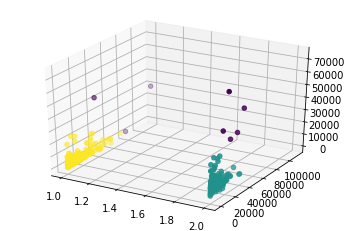

In [73]:
plot_clusters(channel_healthy,"channel","fresh","milk")

Anomalies are found on:
 - high spent on milk
 - high spent on fresh

In [76]:
channel_processed = find_non_clusters(df, ["channel","frozen","grocery"], e=.15, ms=100)

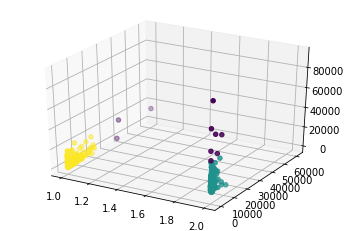

In [77]:
plot_clusters(channel_healthy,"channel","frozen","grocery")

Anomalies are found on:
 - high spent on grocery
 - high spent on frozen

In [88]:
all_processed = find_non_clusters(df, ["frozen","deli","grocery"], e=.25, ms=100)

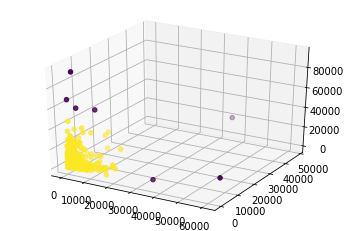

In [89]:
plot_clusters(all_processed,"frozen","deli","grocery")

Anomalies are found on:
 - high spent on grocery with a low spent on frozen
 - high spent on frozen
 - high spent on frozen and grocery 

---